# PTID-CDS-APR-23-1506.

# Fifa20-1

### Using clustering algorithms to categorize similar players using their traits and their different skills in the field.
The datasets provided include the players data from FIFA 20 ("players_20-1.csv"). The data allows multiple comparison of the same players.

Some ideas of possible analysis:

-Historical comparison between Messi and Ronaldo (what skill attributes changed the most during time - compared to real-life stats);


In this project we explore the data through the domain of unsupervised learning performing principal component analysis and clustering analysis. One goal of this project is to best describe the variation in the different types of players. Doing so would equip us with insight into how to best choose players in a team. In a high-dimensional data, it is often difficult to develop an intuition of the features and our goal in this project is to reduce the dimensionality of the dataset so that we can visualize the relationships between the features and clusters in our dataset. We start with 104 features and bring down the dimensionality to 28 features by selecting key features using our domain knowledge, removing highly correlated features using regression techniques, and then further to just two principal components using PCA. We visualize the data using these principal components, perform clustering analysis and visualize the clusters and develop an inference for the same.

# Dataset

FIFA 20 features more than 30 official leagues, over 700 clubs and over 17,000 players. Included for the first time is the Romanian Liga I and its 14 teams, as well as Emirati club Al Ain, who were added following extensive requests from the fans in the region.    
With the amount of player and team data available on the game, this makes for an interesting dataset with a rich in-depth breakdown of every possible recorded attribute a player can have. In addition, football lends a detailed structure to the player data due to the dynamic nature of the game and various positions a player may command. This results in a very complex and interesting structure in the dataset which we will look to explore in this project through unsupervised learning techniques

### Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Loading dataset

In [8]:
pd.set_option('display.max_columns', 500)
data = pd.read_csv('players_20-1.csv') 

In [9]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [10]:
display(data.head())
print(f'The Data has {data.shape[0]} rows and {data.shape[1]} features')

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

The Data has 18278 rows and 104 features


## Data Understanding and cleaning

This dataset provides the complete statistics available at the player level in the FIFA 20 game. This dataset is very clean in terms of the structure and expected data types. We will just transform the data to the format we need, and keep only selected features which might be useful in our analysis. 

Some key observations in the dataset:
-	`potential` and `overall` are highly correlated. `potential` is basically an integer greater than or equal to `overall`.
-	`overall` is a computation based on all the other skill ratings of a player such as `shooting`, `passing`, etc.
-	Unless a player plays at a Goalkeeper position (`GW`), all his goalkeeper statistics are `NaNs`.
-	The columns `ls`, `st`, `rs`, `lw` etc. are playing positions in the game and the data in these columns is basically the max potential of a player if he were to play in that position. We will assume a player only plays in his preferred position and we will drop all these columns.
-	For our analysis, we will drop all columns *unnecessary for our analysis as and when we reach that conclusion*. For now, all descriptive columns like `sofifa_id`, `player_url`, `nationality` etc. will be dropped.
-	`player_positions` are the preferred positions of the player. We will keep only the first playing position for our analysis.


In [21]:
data['player_positions'] = data['player_positions'].str.split(',').str[0]

In [22]:
original_data = data.copy()
data.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,RW,Left,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,ST,Right,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,LW,Right,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,GK,Right,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,LW,Right,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [23]:
def generate_samples(positions = ['CAM', 'RM', 'CDM', 'LM', 'CM'], n_samples = 10):
    '''
    positions = ['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB','RM', 'LM', 'LWB', 'RWB']
    '''
    samples = original_data[original_data.player_positions.isin(positions) & (original_data.overall>=70)].sample(n_samples)
    return samples.index.values

In [24]:
data

,short_name,age,height_cm,weight_kg,nationality,club,overall,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,RW,Left,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,ST,Right,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,LW,Right,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,GK,Right,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,LW,Right,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,CB,Right,1,3,2,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,CB,Right,1,2,2,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,CM,Right,1,2,2,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,CM,Right,1,2,2,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


Lets take a look at the player ratings

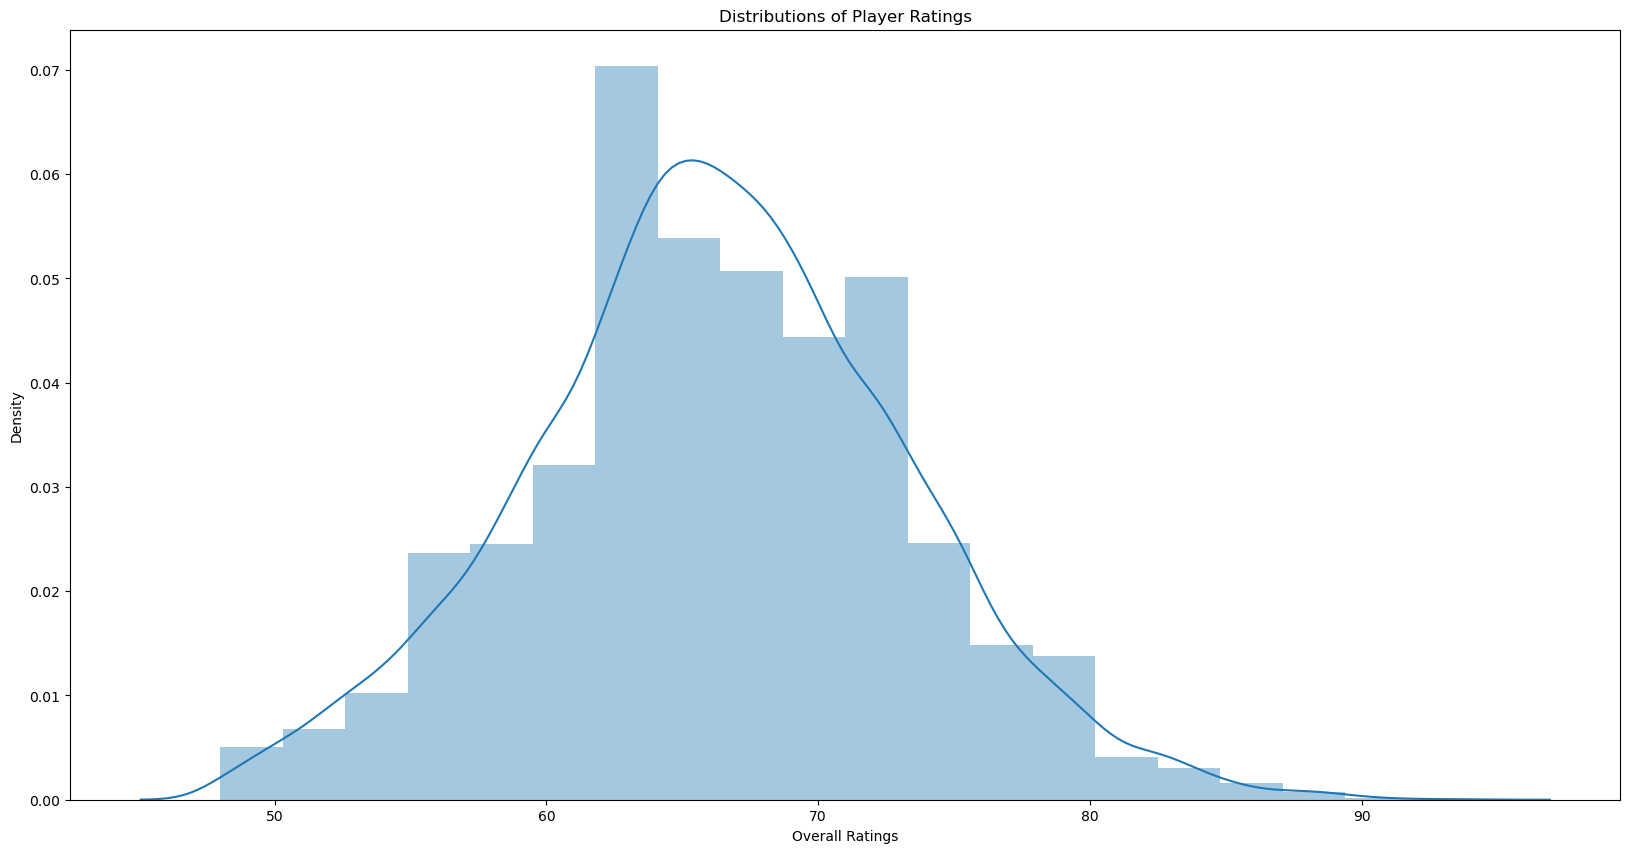

In [16]:
plt.figure(figsize=(20,10))
rcb = sns.distplot(data.overall, bins=20);
rcb.set_title('Distributions of Player Ratings')
rcb.set_xlabel('Overall Ratings');

Since, `overall` decides the overall quality of a player, we can plot its histogram to visualize how players are distributed. For the purpose of this notebook, we will remove players with `overall` rating lower than 70. This is just a soft criterion and a generally decent score on FIFA.

Here we see an almost normal distribution of player age with their rankings.

In [7]:
data = data[data.overall>=70]

In [8]:
pd.DataFrame(data.overall.value_counts().sort_index())

,overall
70,902
71,715
72,753
73,638
74,529
75,506
76,361
77,262
78,239
79,185


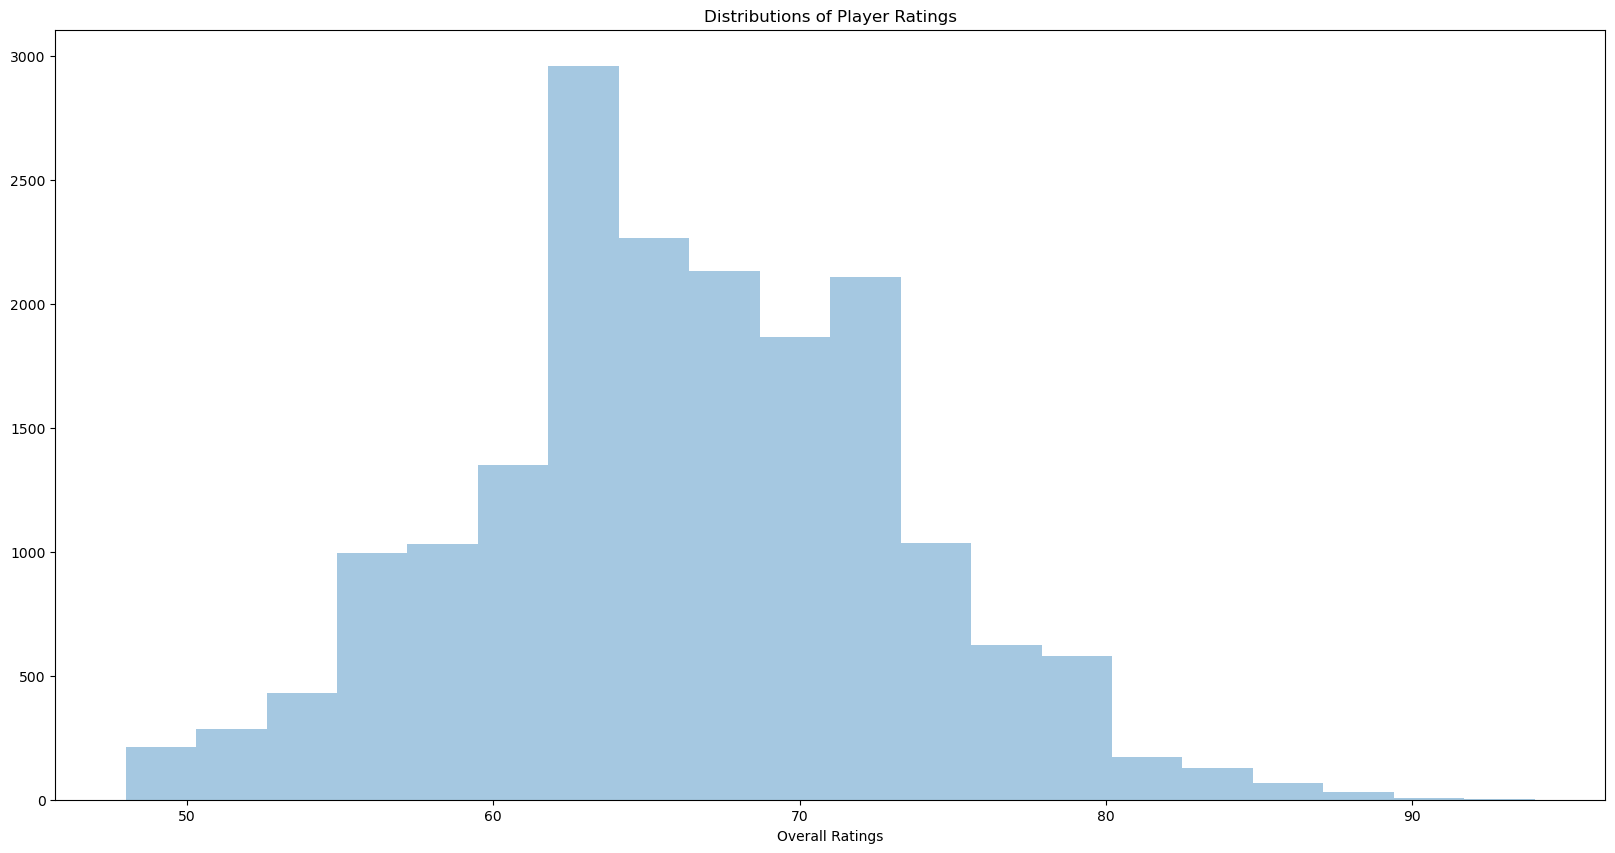

In [25]:
plt.figure(figsize=(20,10))
ax = sns.distplot(data.overall, bins=20,vertical=False,kde=False);
ax.set_title('Distributions of Player Ratings')
ax.set_xlabel('Overall Ratings');

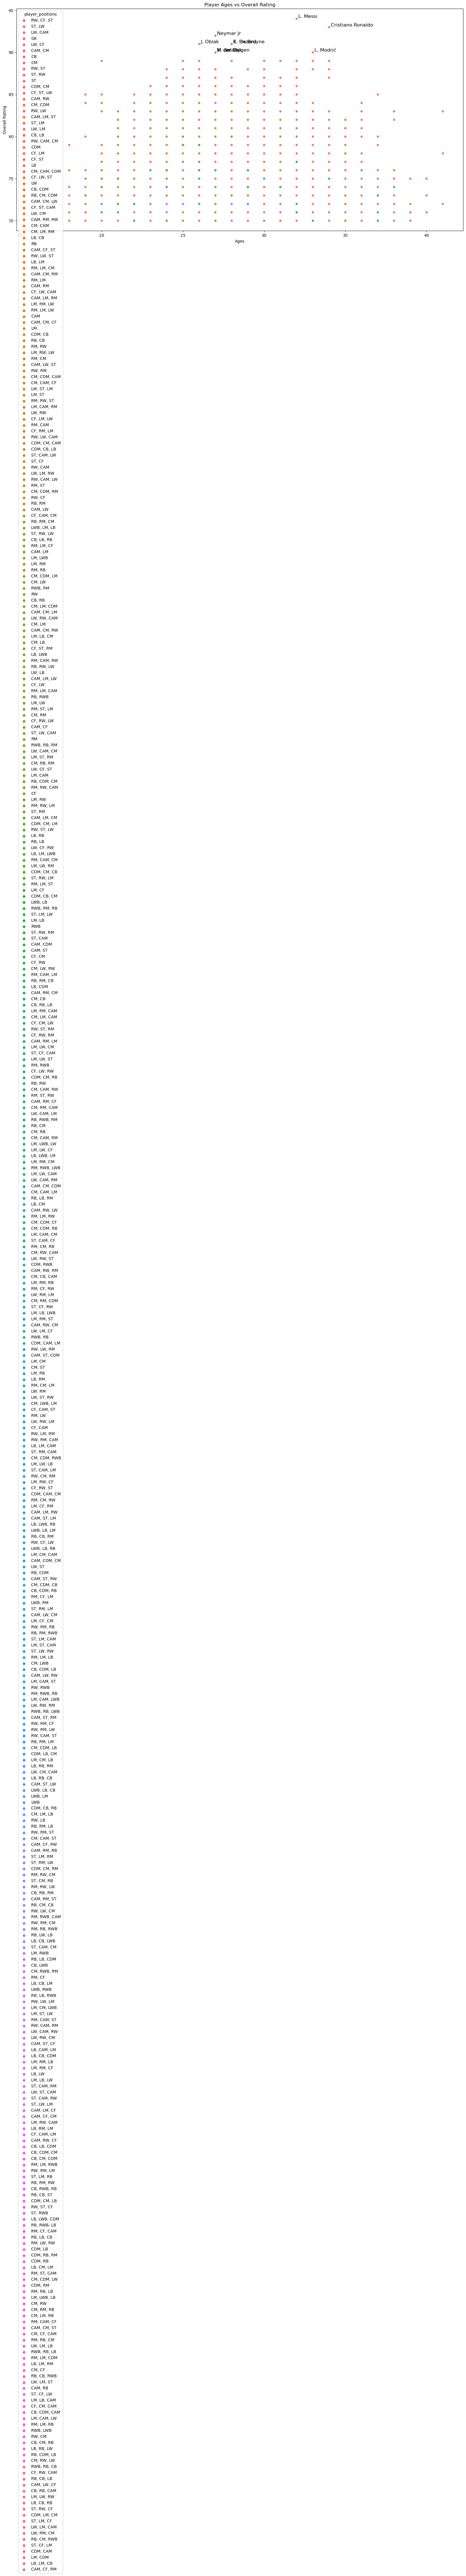

In [10]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot('age','overall',hue='player_positions',data=data);
ax.set_title('Player Ages vs Overall Rating')
ax.set_xlabel('Ages')
ax.set_ylabel('Overall Rating')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if (point['y'] >=90) :
            ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize=12)

label_point( data.age,data.overall, data.short_name, plt.gca())  

We see an obvious yet interesting insight here that a player reaches his maximum potential during the middle of his career, usually in between 25-32 years of age. Since we suspect the data to be highly correlated, we will look at a heatmap of the correlations in the data below.

In [18]:
to_drop = ['sofifa_id','player_url','long_name','potential','dob',\
           'work_rate','body_type','real_face','release_clause_eur','player_tags',\
           'team_position','team_jersey_number','loaned_from','joined','contract_valid_until',\
           'nation_position','nation_jersey_number','player_traits',\
           'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',\
           'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb', 'value_eur','wage_eur']
data = data.drop(to_drop, axis=1)

In [19]:
pd.DataFrame(data.dtypes).T

,short_name,age,height_cm,weight_kg,nationality,club,overall,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,object,int64,int64,int64,object,object,int64,object,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [13]:
# Create correlation matrix
corr_matrix = data.corr().abs()

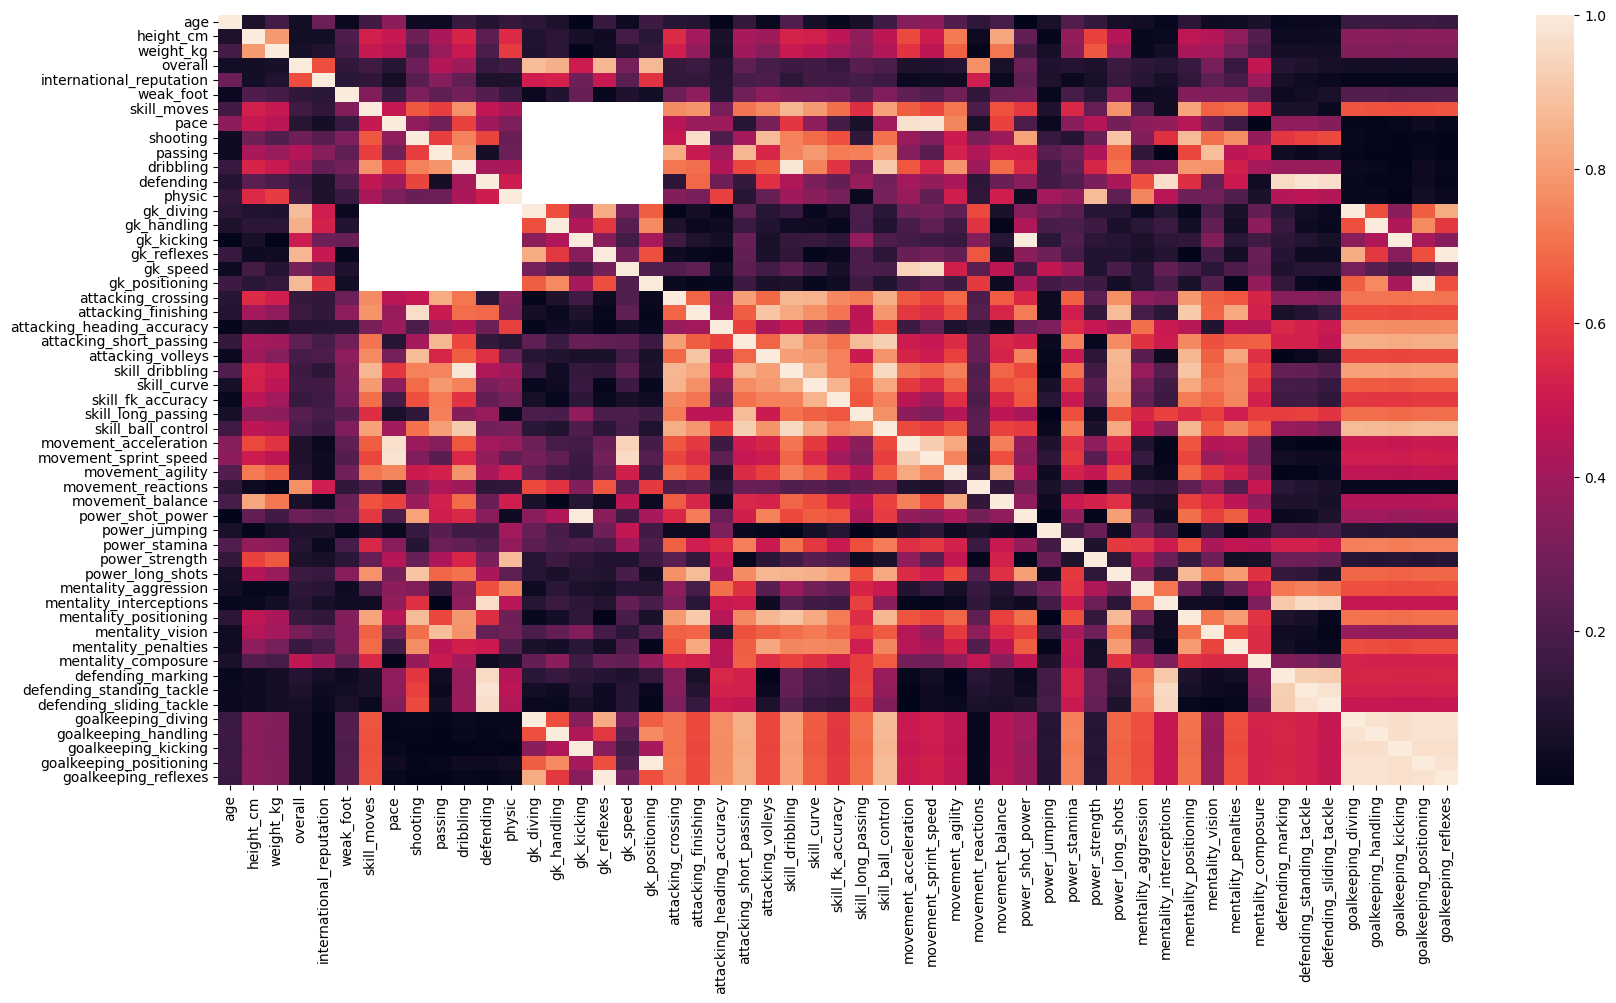

In [14]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)

As we can see, goalkeeper related features are perfectly correlated as seen by the white squares in the data. Goalkeepers are a separate group and none of the main player skills apply to goalkeepers. We will assume this as a separate cluster and remove all goalkeepers from the dataset. Now we will have to also drop the rows with player_position with the value GK. That is, we will also drop all the goalkeepers from the dataset. PCA requires continuous features only and hence we will also drop all features that are categorical. The reason for this is that PCA looks to capture the maximum variance in the data in the principal components and categorical features are discrete in nature with zero variance.

In [26]:
goalkeeper_features = ['gk_handling','gk_reflexes','gk_positioning','gk_diving','gk_kicking','gk_speed',\
                       'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']
data = data.drop(goalkeeper_features, axis = 1)

Now we will have to also drop the rows with `player_position` with the value `GK`. That is, we will also drop all the goalkeepers from the dataset.

In [27]:
data = data[data.player_positions !='GK']

Now let's drop all the categorical features

In [17]:
categorical_features = ['short_name','nationality','club','preferred_foot','player_positions','international_reputation','weak_foot','skill_moves']
data = data.drop(categorical_features, axis =1)
data = data.fillna(0)
data.shape

(5137, 39)

# Feature Relevance
Now we are left with over `39` variables.    

Let us build a `DecisionTree` model to check if initial assumptions that "`overall` and other summary skills are be explained by the other variables". We will create a function to perform this regression. The function will run regression with some feature as response and all other features as predictors. The `R2 scores` for response greater than `0.95` only is shown below. We will remove these features as the variance in these features can be explained by the remaining variables and they do not add a lot of further information to our analysis.

In [18]:
def model_features(data, feature, random_state, hc_feat):
    new_data = data.drop(feature, axis = 1)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = 0.20, random_state = random_state)

    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score =  regressor.score(X_test, y_test)
    if score >= 0.95:
        hc_feat.append(feature)
        print("R2 Score for feature {} is {}".format(feature, round(score,3) ))
    else:
        pass
    return hc_feat

In [19]:
hc_feat = []
for key in data:
    model_features(data, key, random_state=13263600,hc_feat=hc_feat)

R2 Score for feature pace is 0.997
R2 Score for feature shooting is 0.984
R2 Score for feature passing is 0.957
R2 Score for feature dribbling is 0.982
R2 Score for feature defending is 0.99
R2 Score for feature physic is 0.956
R2 Score for feature attacking_finishing is 0.968
R2 Score for feature skill_dribbling is 0.966
R2 Score for feature movement_acceleration is 0.985
R2 Score for feature movement_sprint_speed is 0.99
R2 Score for feature defending_standing_tackle is 0.954


As we can see the features `pace`,`shooting`,`passing`,`dribbling`,`defending`,`physic` have very high R2 scores. 
Also, we see that the features `attacking_finishing`, `skill_dribbling`, `movement_acceleration`,`movement_sprint_speed`,`defending_standing_tackle` have R2 scores over 0.95.
For these reasons we will drop these features as well for our analysis.

In [20]:
data = data.drop(hc_feat, axis = 1)
print(data.shape)
data.head()

(5137, 28)


,age,height_cm,weight_kg,overall,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
0,32,170,72,94,88,70,92,88,93,94,92,96,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,26
1,34,187,83,93,84,89,83,87,81,76,77,92,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,24
2,27,175,68,92,87,62,87,87,88,87,81,95,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,29
4,28,175,74,91,81,61,89,83,83,79,83,94,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,22
5,28,181,70,91,93,55,92,82,85,83,91,91,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,51


# Feature Scaling

Since, for PCA we need scaled data, we will transform the dataset by trying various scaling techniques. The original distribution of the dataset can be seen in the figure below.

In [21]:
data.describe()

,age,height_cm,weight_kg,overall,attacking_crossing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_sliding_tackle
count,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000,5137.000000
mean,27.238466,180.846019,75.636948,74.111154,61.991435,63.390695,70.702939,54.812147,60.446759,54.202842,64.488417,71.441697,69.642788,71.002531,67.533969,68.626630,68.827720,72.396535,70.092272,60.560055,66.917656,57.048277,62.718123,63.685420,58.130816,69.945688,57.036208,54.375900
std,3.956364,6.577557,6.848237,3.774699,13.665833,11.807095,6.730381,15.634589,15.046577,15.943159,10.100465,7.548968,12.539995,5.719511,13.123799,10.985493,12.037265,10.093500,11.576747,14.857905,13.383629,19.804241,14.866945,12.294777,12.978836,7.029337,18.685654,21.101802
min,16.000000,156.000000,52.000000,70.000000,11.000000,20.000000,41.000000,11.000000,12.000000,10.000000,21.000000,33.000000,26.000000,50.000000,26.000000,15.000000,29.000000,29.000000,27.000000,12.000000,22.000000,10.000000,12.000000,13.000000,13.000000,32.000000,10.000000,10.000000
25%,24.000000,176.000000,71.000000,71.000000,55.000000,56.000000,67.000000,43.000000,51.000000,41.000000,59.000000,68.000000,63.000000,67.000000,60.000000,63.000000,62.000000,67.000000,63.000000,54.000000,59.000000,39.000000,56.000000,58.000000,49.000000,65.000000,41.000000,34.000000
50%,27.000000,181.000000,75.000000,73.000000,65.000000,65.000000,71.000000,58.000000,64.000000,56.000000,66.000000,72.000000,71.000000,71.000000,69.000000,71.000000,70.000000,73.000000,71.000000,65.000000,70.000000,66.000000,67.000000,66.000000,60.000000,70.000000,65.000000,64.000000
75%,30.000000,186.000000,80.000000,76.000000,72.000000,72.000000,75.000000,67.000000,72.000000,68.000000,71.000000,76.000000,78.000000,74.000000,76.000000,76.000000,77.000000,79.000000,78.000000,71.000000,76.000000,73.000000,73.000000,72.000000,68.000000,75.000000,72.000000,72.000000
max,41.000000,203.000000,101.000000,94.000000,93.000000,93.000000,92.000000,90.000000,94.000000,94.000000,92.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,97.000000,95.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,90.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


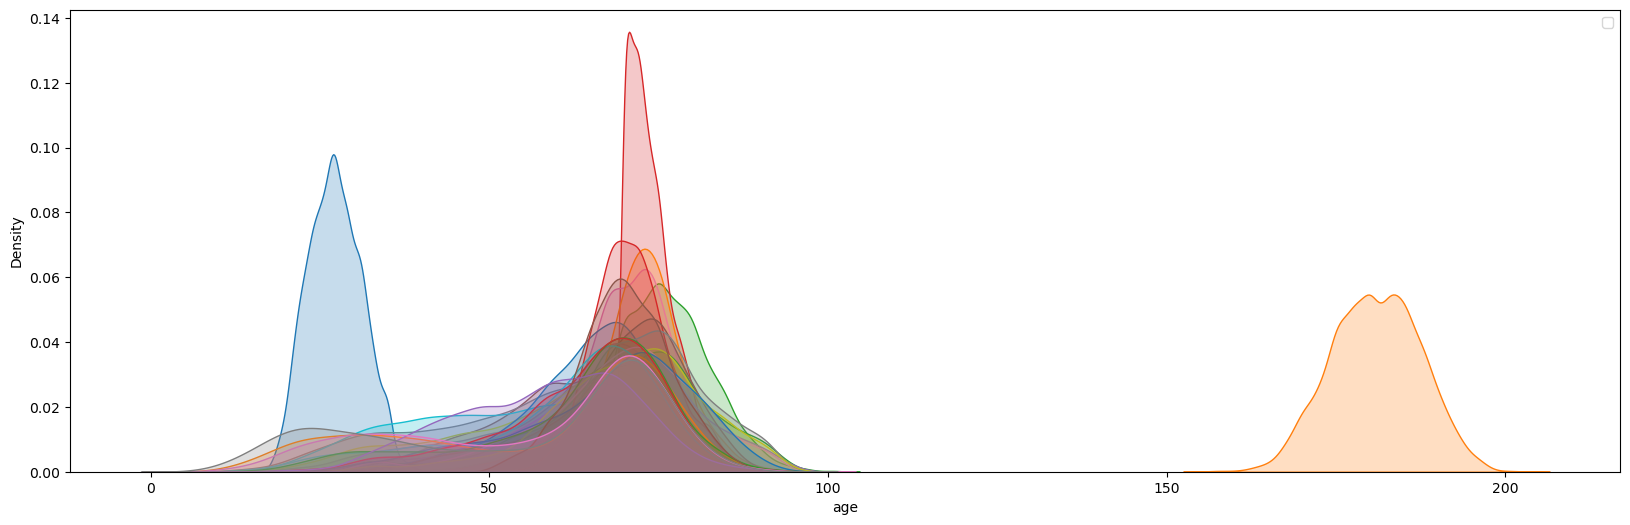

In [22]:
plt.figure(figsize=(20,6))
for col in data.columns:
    sns.kdeplot(data[col], shade=True)
plt.legend(loc='best');

## Transforming the data for PCA

In [23]:
from sklearn.decomposition import PCA
def pca_results(data, n_components=8):
    #PCA model
    pca = PCA(n_components=n_components, random_state=1).fit(data)
    
    #DataFrame creation
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(data.columns))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (25,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    plt.legend(loc='upper right')

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

    # Return a concatenated DataFrame
    df = pd.concat([variance_ratios, components], axis = 1)
    print(f'Total Variance Explained by the first 2 dimensions: {df.iloc[:2,0].sum()}')
    return df

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

log_data = np.log(data)

scaler = StandardScaler()
minmax = MinMaxScaler()

minmax.fit(data)
scaler.fit(data)

scaled_data = scaler.transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)

minmax_data = minmax.transform(data)
minmax_data = pd.DataFrame(minmax_data, columns=data.columns)

scaler.fit(log_data)
log_normal_data = scaler.transform(log_data)
log_normal_data = pd.DataFrame(log_normal_data, columns=data.columns)

In [25]:
def plot_transformed_data(data):
    plt.figure(figsize=(20,6))
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)
    plt.legend(loc='best');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


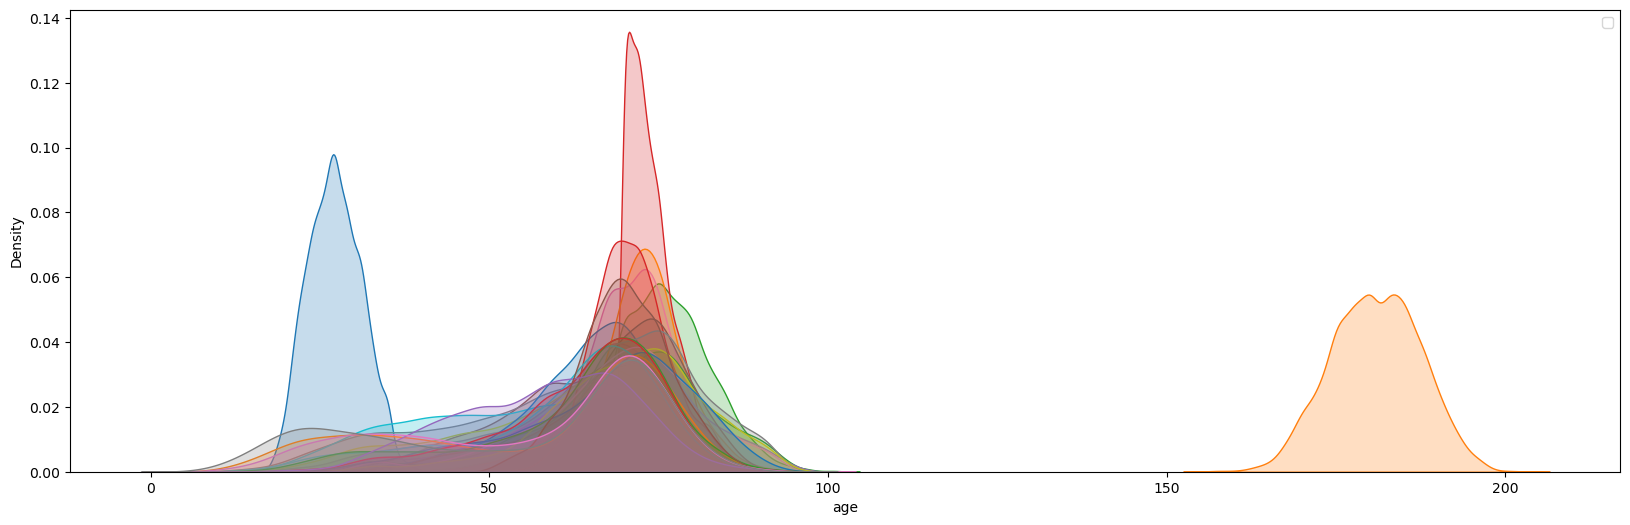

In [26]:
#Data
plot_transformed_data(data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


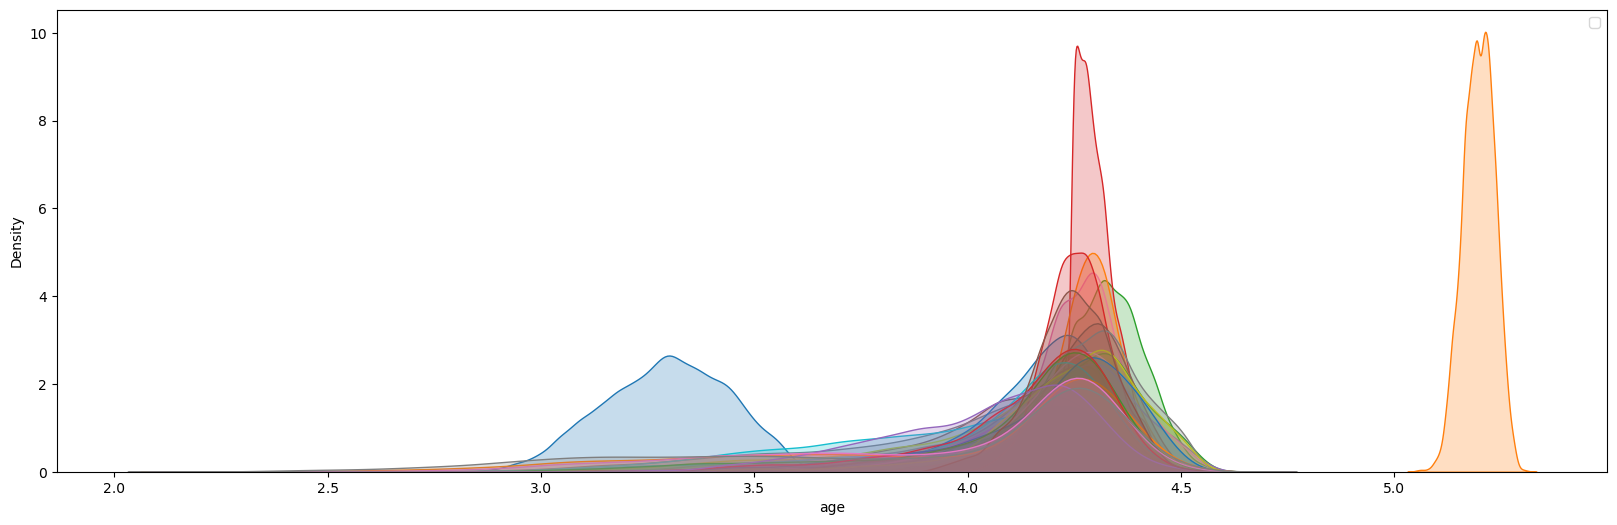

In [27]:
#Log
plot_transformed_data(log_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


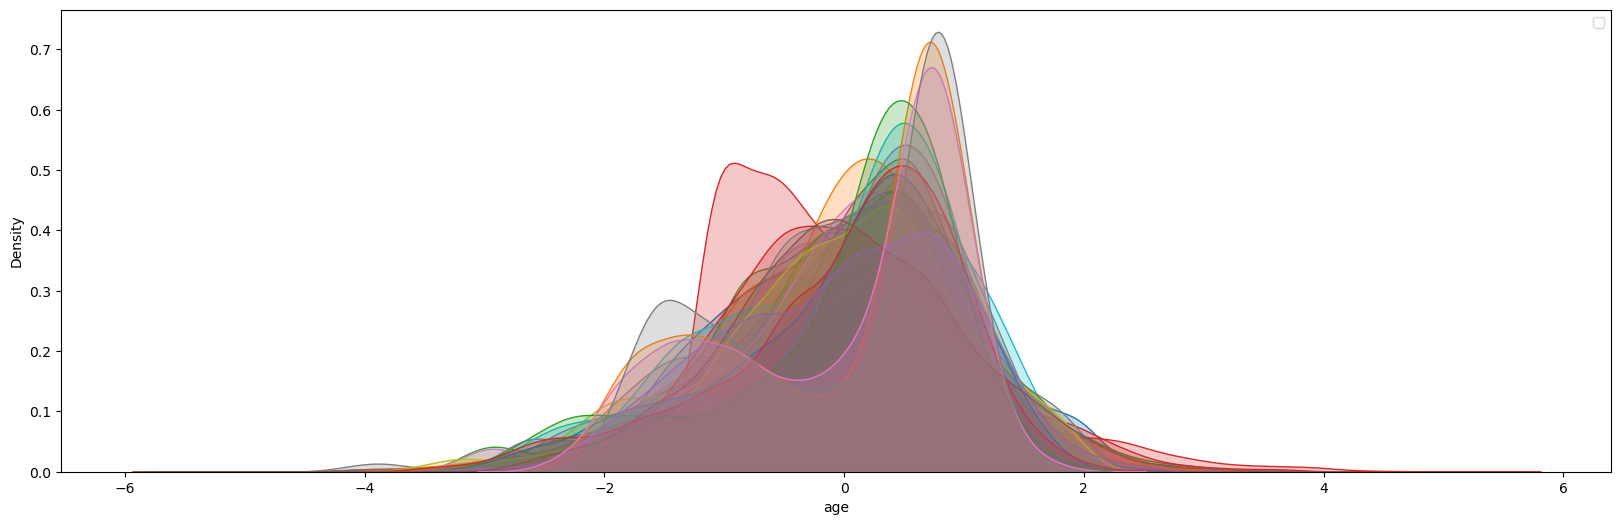

In [28]:
plot_transformed_data(scaled_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


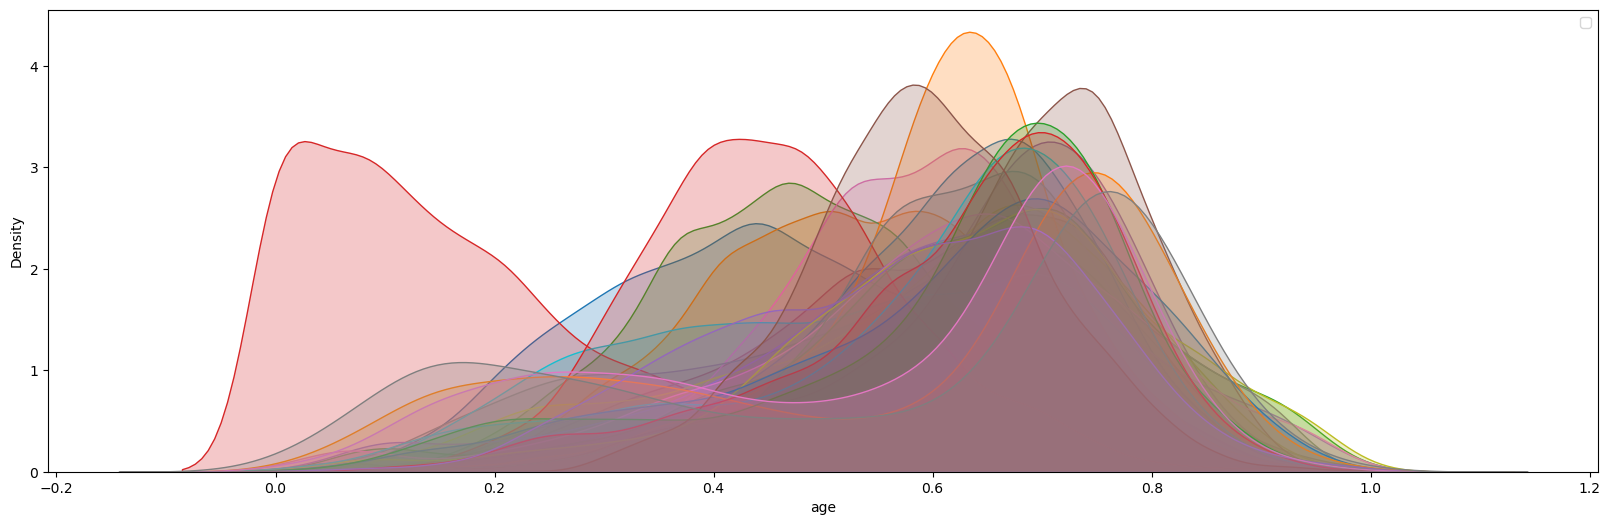

In [29]:
plot_transformed_data(minmax_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


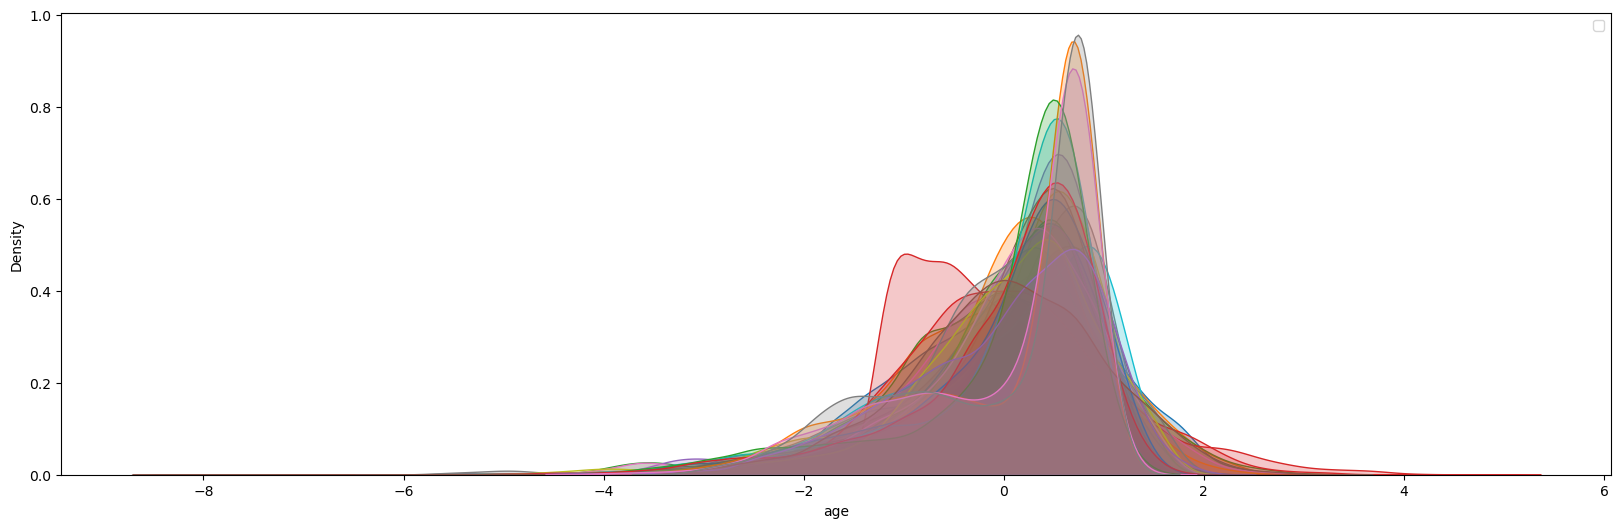

In [30]:
plot_transformed_data(log_normal_data)

Total Variance Explained by the first 2 dimensions: 0.6837


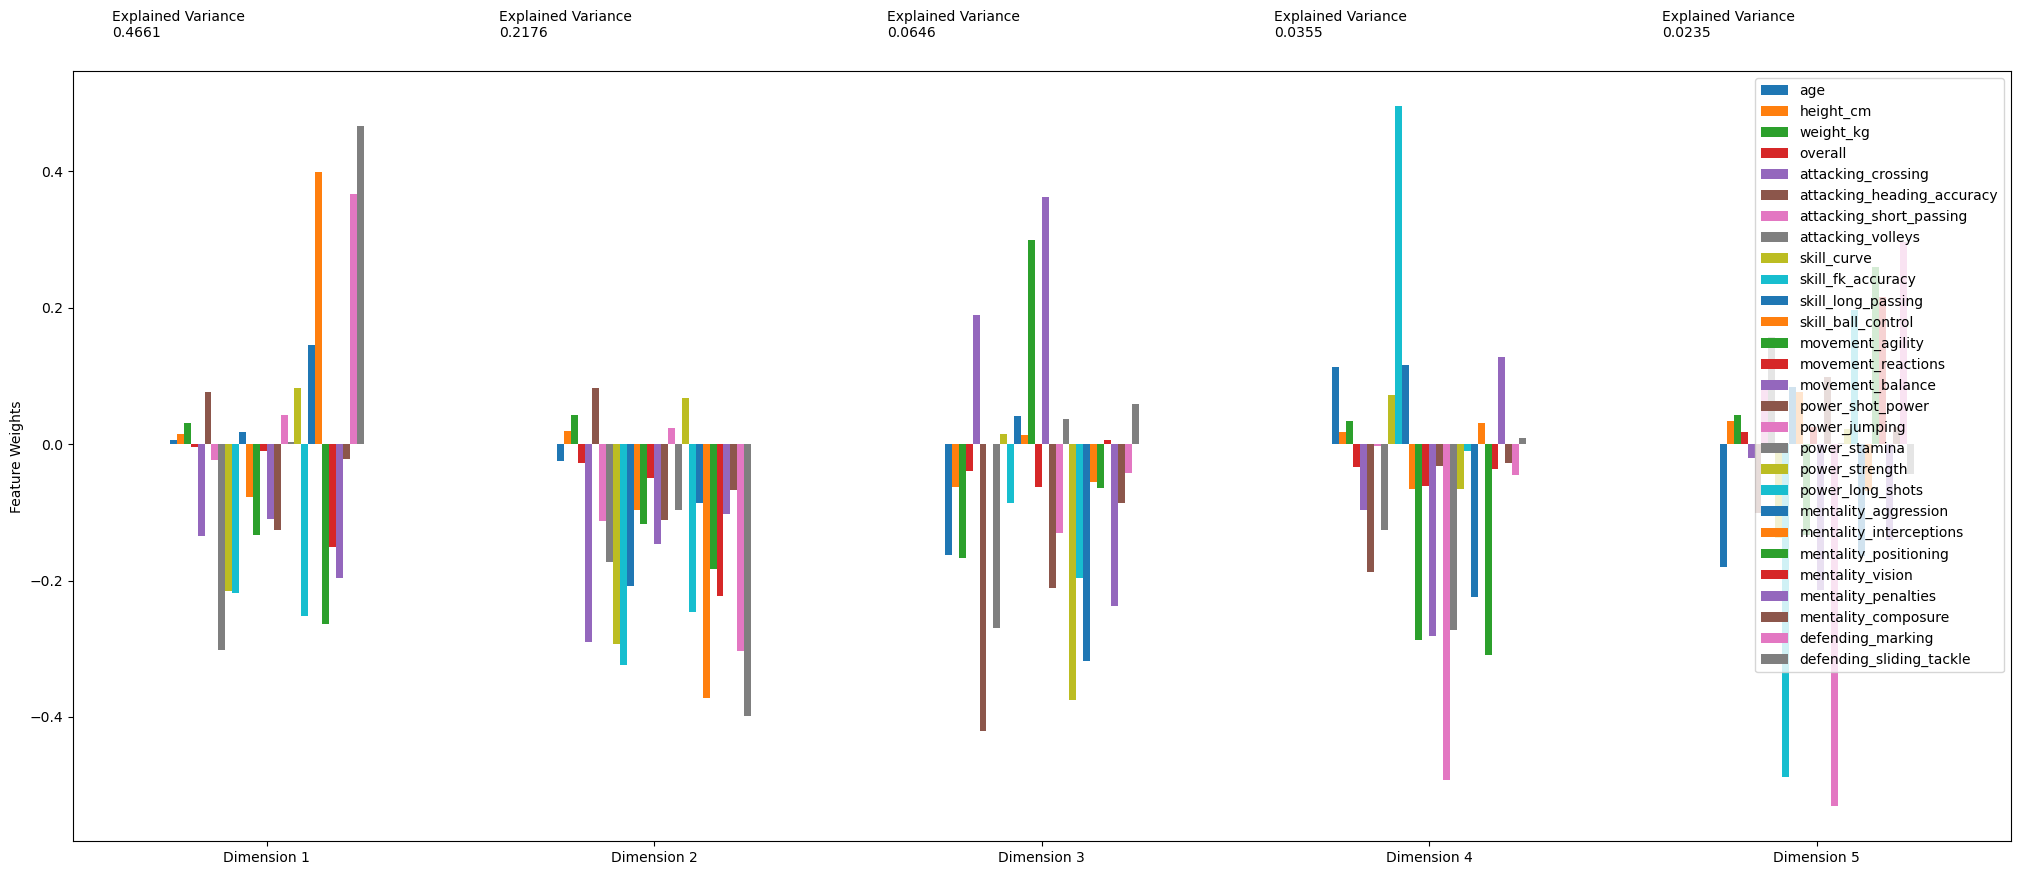

In [31]:
pca_log = pca_results(log_data, 5)

Total Variance Explained by the first 2 dimensions: 0.5254


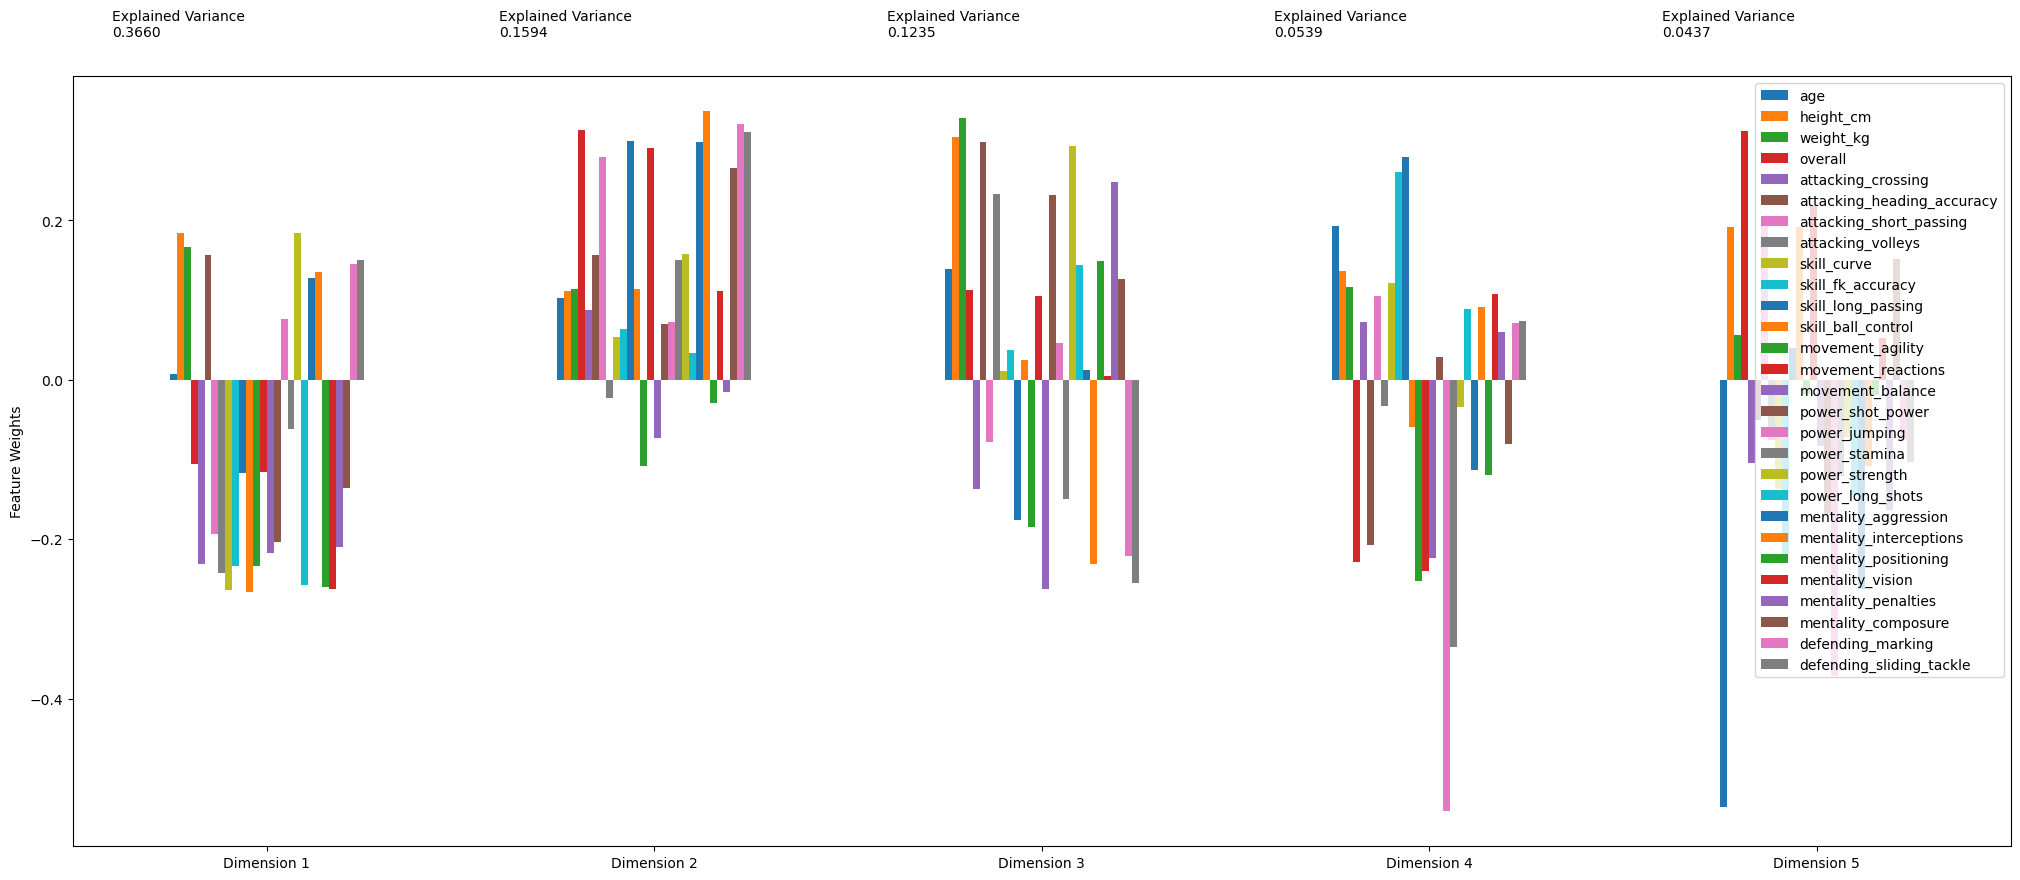

In [32]:
pca_scaled = pca_results(scaled_data, 5)

Total Variance Explained by the first 2 dimensions: 0.5724


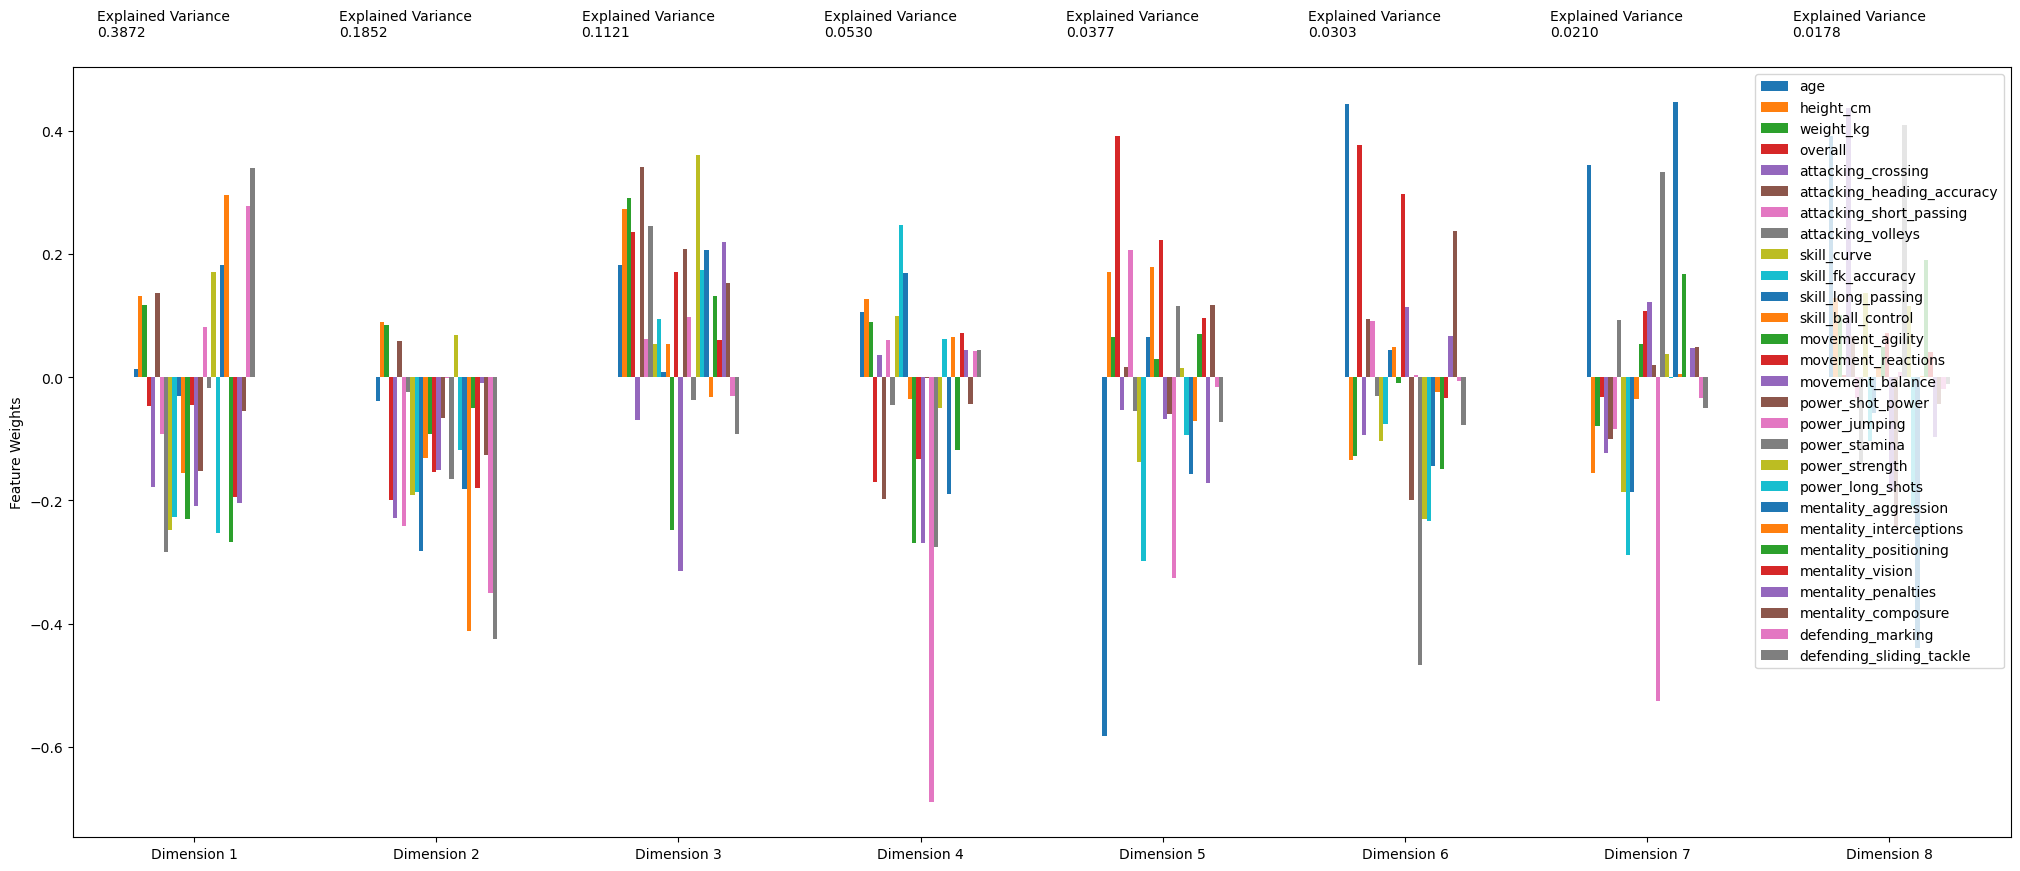

In [33]:
pca_minmax = pca_results(minmax_data)

Total Variance Explained by the first 2 dimensions: 0.5079


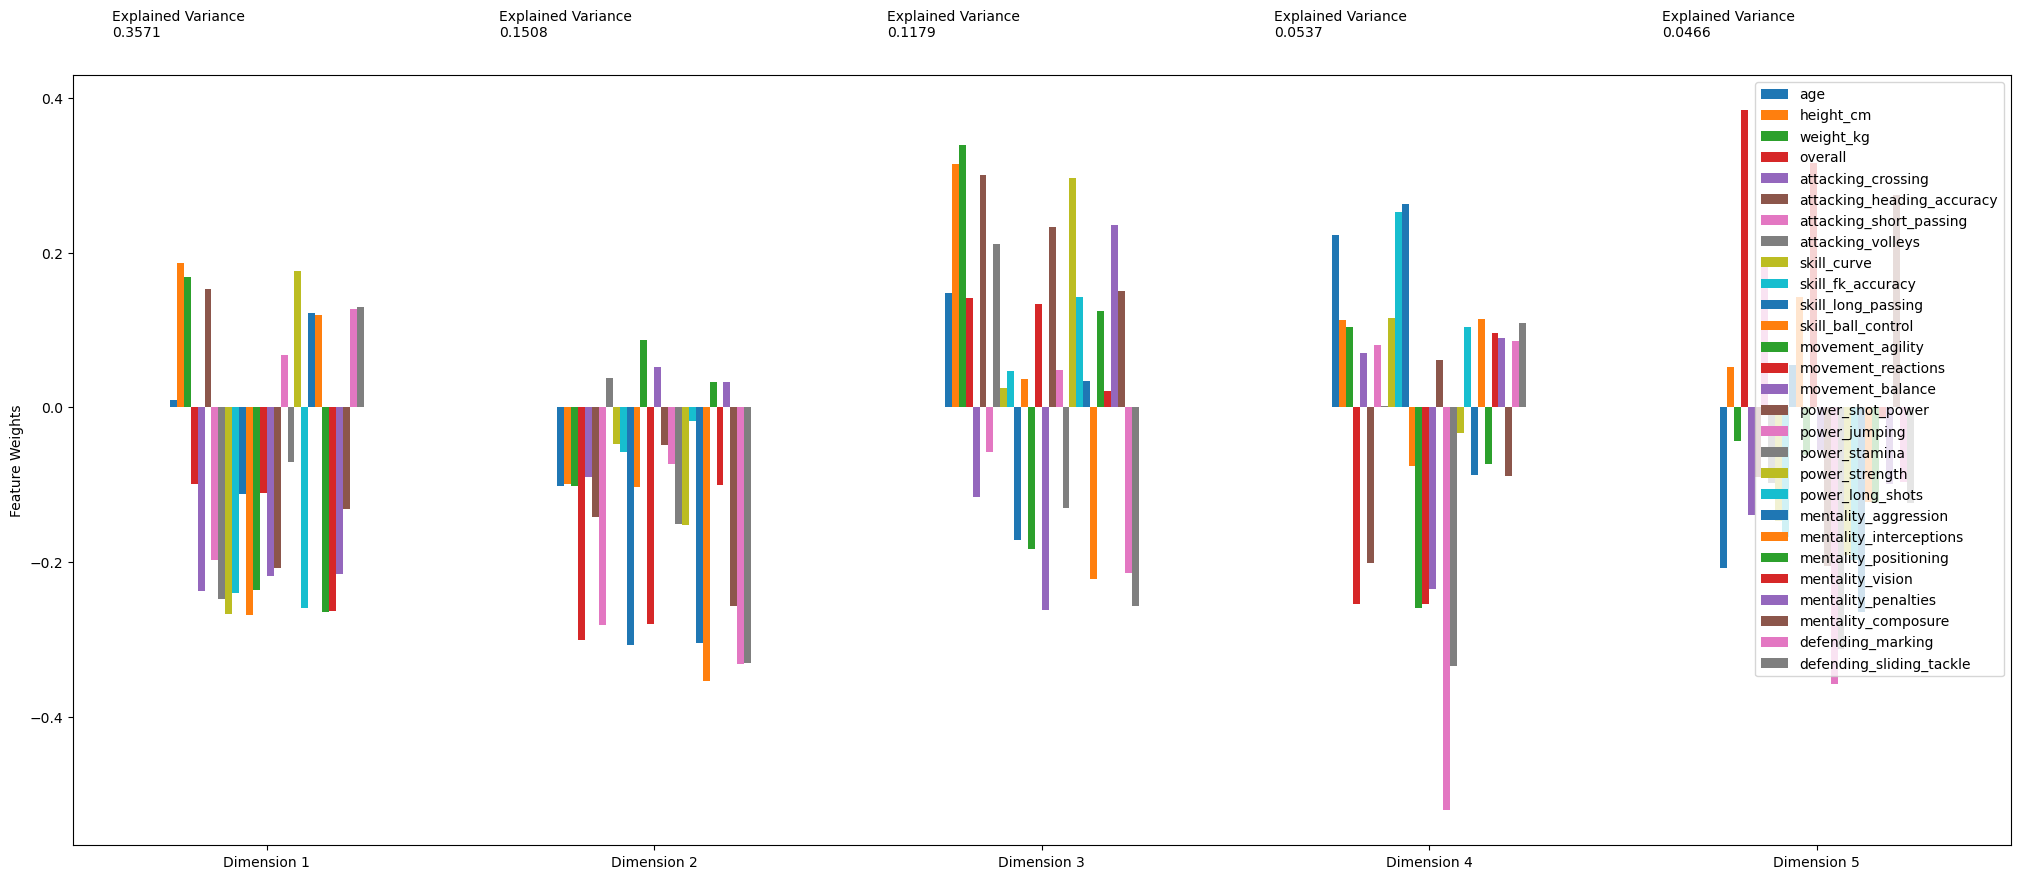

In [34]:
pca_log_normal = pca_results(log_normal_data,5)

The scaling techniques and variance explained by the first two principal components are summarized in the table below:

| Scaling Technique | Variance explained by PC1 and PC2 |
|------|------|
|   Log Scaling	  |    68.4%    |
|   Standard Scaling  |    52.5%    |
|   Min Max Scaling  |    57.2%    |
|   Log normal Scaling  |    50.8%    |


# PCA Analysis

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem.    
However, dimensionality reduction comes at a cost as fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.    

Since PCs describe variation and account for the varied influences of the original characteristics, we can plot the PCs to find out which feature produces the differences among clusters.    
To do this we plot the loadings, or vectors representing each feature of the PC plot centered at (0, 0) with the direction and length of these vectors showing how much significance each feature has on the PCs. A plot that visualizes the above information is called a Biplot.


In [35]:
def make_pca(data, sample_ids):
    pca = PCA(n_components=2).fit(data)
    reduced_data = pca.transform(log_data)
    pca_samples = pca.transform(log_data[log_data.index.isin(sample_ids)])
    reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
    return pca, reduced_data, pca_samples


In [36]:
pca, reduced_data, pca_samples = make_pca(log_data, sample_ids = generate_samples(['CAM','CM']))

NameError: name 'original_data' is not defined

In [ ]:
def biplot(log_data, reduced_data, pca):

    fig, ax = plt.subplots(figsize = (10,10))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 4.0, 5.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, log_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax
    

The Biplot for our dataset is provided below. As we can see, the features mentality_interceptions, defending_sliding_tackle and defending_marking is close together. Also, these strongly influence both PC1 and PC2.  

In [ ]:
biplot(log_data, reduced_data, pca);

# Clustering

In this section, we choose to use a K-Means clustering algorithm to identify the various player segments hidden in the data.    

Based on the data, it seems KMeans would do a good job assuming that the players are well segmented, and each player assumes a special role.    

Depending on the problem, the number of clusters in the data may not be known in advance. As a result, we do not know for sure if a certain number of clusters are the best choice for our data. Since we do not know the structure present in the data, in order to measure the “goodness” of our clustering, we calculate each point’s **silhouette coefficient.**    
   

The Silhouette Coefficient is defined for each sample and is composed of two scores (a and b):

a.	The mean distance between a sample and all other points in the same class.
b.	The mean distance between a sample and all other points in the next nearest cluster.    

The Silhouette Coefficient s for a single sample is then given as:

$$ s = \frac{b-a}{max(a, b)}$$


The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. In our analysis, we receive the highest Silhouette Score of about `0.53` for three clusters. Another popular method to guess the appropriate number of clusters is the **Elbow Method**. In this method, we choose that value of `K`, which lies at the elbow of the curve plotted between the number of clusters and sum of distances between each point and its centroid. As we can see from the image below, the elbow of the curve appears at 3 clusters thus concurring with the Silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def cluster(reduced_data,n_clusters,pca_samples=pca_samples):
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)    
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    return preds, centers, sample_preds

def silhouette_scorer(reduced_data,n_clusters):
    preds,_,_ = cluster(reduced_data,n_clusters)
    score = silhouette_score(reduced_data, preds)
    return score

for n_clusters in range(2,10):
    score = silhouette_scorer(reduced_data,n_clusters)
    print ("Silhoutte Score for {} cluster is {}".format(n_clusters,score))


In [ ]:
inertia = []
clusters = range(2,10)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    inertia.append(clusterer.inertia_)

plt.plot(clusters, inertia)
plt.ylabel('Inertia')
plt.xlabel('n_clusters')
plt.title('Elbow Method');


So we get three clusters

In [ ]:
def cluster_results(reduced_data, preds, centers, pca_samples):
   
    import matplotlib.cm as cm
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Cenhttps://www.fifauteam.com/wp-content/uploads/2012/08/A046-1.jpgtroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

In [ ]:
original_data.player_positions.unique()

![](https://www.fifauteam.com/wp-content/uploads/2012/08/A046-1.jpg)

In [ ]:
sample_ids = generate_samples(['CB','LB','RB'], 10)

_, _, pca_samples = make_pca(log_data, sample_ids)
preds, centers, sample_preds = cluster(reduced_data, 3)
cluster_results(reduced_data, preds, centers, pca_samples)

In [ ]:
sample_ids = generate_samples(['ST','CF'], 10)

_, _, pca_samples = make_pca(log_data, sample_ids)
preds, centers, sample_preds = cluster(reduced_data, 3)
cluster_results(reduced_data, preds, centers, pca_samples)

In [ ]:
sample_ids = generate_samples(['CM','RM','LM','CAM','CDM'], 10)

_, _, pca_samples = make_pca(log_data, sample_ids)
preds, centers, sample_preds = cluster(reduced_data, 3)
cluster_results(reduced_data, preds, centers, pca_samples)

# Results

It appears that from the results above, the clusters are separated by the three main playing positions in the game.

- Forwards (Green cluster or Cluster 1)
- Midfielders (Pink cluster or Cluster 2)
- Defenders (Red cluster or Cluster 0)

## Interpretation
    
The Biplot maps the original features as vectors to the principal components and comparing the clusters and the feature vectors.    

For example, lets take a look at Cluster 0, which is the Red cluster. We have inferred that its a cluster of defenders based on the random samples. Now, if we take a look at the Biplot, we can see that some of the features vectors have strong influence along the direction of this cluster is `defending_marking`, `mentality_interceptions`, `defending_sliding_tackle`.    

Similarly, we can observe that, the most important features in along cluster 2 are `skill_long_passing`, `short_passing`, `power_stamina`, `mental_composure` etc. Thus, we can infer that midfielders are the players that possess these traits and we can identify the strongest players in this cluster for a midfielder role.

And finally, for a forward player, the main job is to score goals and naturally, the important features along this direction are Some of the key ones are `attacking`, `volleys`, `mentality_positioning`, `attacking_header_accuracy`. 